# Step 1. Openning the data file and studying the general information

First we import packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Openning the data file

In [2]:
df_games = pd.read_csv('/datasets/games.csv')
print(df_games.head(10))
print(df_games.info())

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [5]:
display(df_games.head())
df_games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


## Conclusion
We can see some null data. Also we can see that sales were separated in 3 areas (NA, EU, JP and others) that we can compare between them or join them to total_sales, and also the platform is categorized. The scores are not synchronize by the size, and there is not any conclusion of all the scores together for total_score.
We can see that there are few rows without name or year release. For year we may put the mean/median/most popular. For Name we may erase them, and for score we may put mean or something else.
We see some 'object' type instead of strings, and dates that are float64.
Some of the games are for some platforms, so there could be that they where rated once for only one platform.

# Step 2. Preparing the data

### 2.1 Replacing the column names (make them lowercase).

In [6]:
df_games.columns = df_games.columns.str.lower()
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [7]:
print(df_games['name'].unique())
print(df_games['name'].value_counts())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Need for Speed: Most Wanted                            12
Madden NFL 07                                           9
FIFA 14                                                 9
LEGO Marvel Super Heroes                                9
Ratatouille                                             9
                                                       ..
Harukanaru Toki no Naka de 3 with Izayoiki Aizouban     1
Jikkyou Powerful Pro Yakyuu Portable 3                  1
Super Robot Taisen OG Infinite Battle                   1
Castlevania: Legacy of Darkness                         1
Deal or No Deal: The Banker is Back!                    1
Name: name, Length: 11559, dtype: int64


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


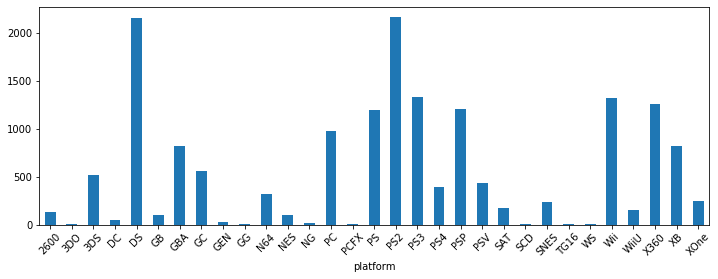

In [8]:
print(df_games['platform'].unique())
bar_platform = df_games.groupby(['platform']).agg({'platform':'count'}).rename(columns={'platform':'count'})
bar_platform.plot(kind='bar', rot=45, figsize=(12,4),legend=False)

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


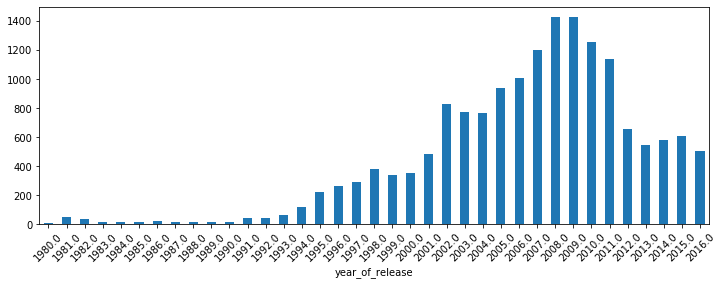

In [9]:
print(df_games['year_of_release'].unique())
# print(df_games['year_of_release'].value_counts())
bar_year = df_games.groupby(['year_of_release']).agg({'year_of_release':'count'}).rename(columns={'year_of_release':'count'})
bar_year.plot(kind='bar', rot=45, figsize=(12,4),legend=False)

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


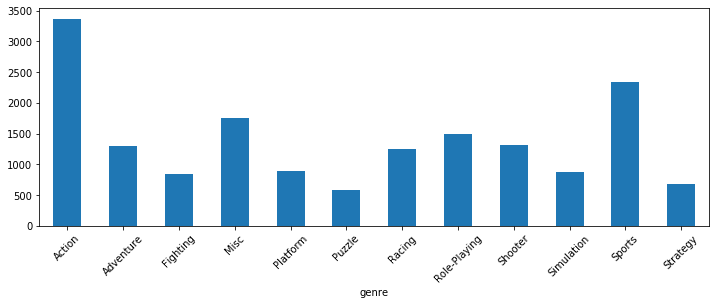

In [10]:
print(df_games['genre'].unique())
# print(df_games['genre'].value_counts())
bar_genre = df_games.groupby(['genre']).agg({'genre':'count'}).rename(columns={'genre':'count'})
bar_genre.plot(kind='bar', rot=45, figsize=(12,4),legend=False)

In [11]:
print(df_games['na_sales'].unique())
print('Max: ',df_games['na_sales'].max())
print('Mean: ',df_games['na_sales'].mean())
print('Min: ',df_games['na_sales'].min())
print(df_games['na_sales'].value_counts())

[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e+00 6.030e+00 9.700e+00 5.280e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.620e+00 5.030e+00 5.990e+00
 3.960e+00 2.500e+00 7.970e+00 6.910e+00 4.340e+00 4.350e+00 3.010e+00
 6.160e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.010e+00
 6.730e+00 5.950e+00 3.660e+00 5.550e+00 7.040e+00 6.650e+00 3.880e+00
 5.800e+00 4.100e+00 5.930e+00 4.360e+00 5.700e+00 2.030e+00 4.400e+00
 5.050e+00 3.540e+00 1.120e+00 6.820e+00 1.750e+00 3.740e+00 1.060e+00
 2.790e+00 2.910e+00 9.900e-01 2.570e+00 2.990e+00 2.280e+00 7.280e+00
 2.760e+00 2.900e+00 2.810e+00 6.600e-01 3.780e+00 3.270e+00 3.560e+00
 5.390e+00 4.590e+00 4.810e+00 4.460e+00 3.480e+00 2.850e+00 2.530e+00
 2.980

In [12]:
print(df_games['eu_sales'].unique())
print('Max: ',df_games['eu_sales'].max())
print('Mean: ',df_games['eu_sales'].mean())
print('Min: ',df_games['eu_sales'].min())
print(df_games['eu_sales'].value_counts())

[2.896e+01 3.580e+00 1.276e+01 1.093e+01 8.890e+00 2.260e+00 9.140e+00
 9.180e+00 6.940e+00 6.300e-01 1.095e+01 7.470e+00 6.180e+00 8.030e+00
 4.890e+00 8.490e+00 9.090e+00 4.000e-01 3.750e+00 9.200e+00 4.460e+00
 2.710e+00 3.440e+00 5.140e+00 5.490e+00 3.900e+00 5.350e+00 3.170e+00
 5.090e+00 4.240e+00 5.040e+00 5.860e+00 3.680e+00 4.190e+00 5.730e+00
 3.590e+00 4.510e+00 2.550e+00 4.020e+00 4.370e+00 6.310e+00 3.450e+00
 2.810e+00 2.850e+00 3.490e+00 1.000e-02 3.350e+00 2.040e+00 3.070e+00
 3.870e+00 3.000e+00 4.820e+00 3.640e+00 2.150e+00 3.690e+00 2.650e+00
 2.560e+00 3.110e+00 3.140e+00 1.940e+00 1.950e+00 2.470e+00 2.280e+00
 3.420e+00 3.630e+00 2.360e+00 1.710e+00 1.850e+00 2.790e+00 1.240e+00
 6.120e+00 1.530e+00 3.470e+00 2.240e+00 5.010e+00 2.010e+00 1.720e+00
 2.070e+00 6.420e+00 3.860e+00 4.500e-01 3.480e+00 1.890e+00 5.750e+00
 2.170e+00 1.370e+00 2.350e+00 1.180e+00 2.110e+00 1.880e+00 2.830e+00
 2.990e+00 2.890e+00 3.270e+00 2.220e+00 2.140e+00 1.450e+00 1.750e+00
 1.040

In [13]:
print(df_games['jp_sales'].unique())
print('Max: ',df_games['jp_sales'].max())
print('Mean: ',df_games['jp_sales'].mean())
print('Min: ',df_games['jp_sales'].min())
print(df_games['jp_sales'].value_counts())

[3.770e+00 6.810e+00 3.790e+00 3.280e+00 1.022e+01 4.220e+00 6.500e+00
 2.930e+00 4.700e+00 2.800e-01 1.930e+00 4.130e+00 7.200e+00 3.600e+00
 2.400e-01 2.530e+00 9.800e-01 4.100e-01 3.540e+00 4.160e+00 6.040e+00
 4.180e+00 3.840e+00 6.000e-02 4.700e-01 5.380e+00 5.320e+00 5.650e+00
 1.870e+00 1.300e-01 3.120e+00 3.600e-01 1.100e-01 4.350e+00 6.500e-01
 7.000e-02 8.000e-02 4.900e-01 3.000e-01 2.660e+00 2.690e+00 4.800e-01
 3.800e-01 5.330e+00 1.910e+00 3.960e+00 3.100e+00 1.100e+00 1.200e+00
 1.400e-01 2.540e+00 2.140e+00 8.100e-01 2.120e+00 4.400e-01 3.150e+00
 1.250e+00 4.000e-02 0.000e+00 2.470e+00 2.230e+00 1.690e+00 1.000e-02
 3.000e+00 2.000e-02 4.390e+00 1.980e+00 1.000e-01 3.810e+00 5.000e-02
 2.490e+00 1.580e+00 3.140e+00 2.730e+00 6.600e-01 2.200e-01 3.630e+00
 1.450e+00 1.310e+00 2.430e+00 7.000e-01 3.500e-01 1.400e+00 6.000e-01
 2.260e+00 1.420e+00 1.280e+00 1.390e+00 8.700e-01 1.700e-01 9.400e-01
 1.900e-01 2.100e-01 1.600e+00 1.600e-01 1.030e+00 2.500e-01 2.060e+00
 1.490

In [14]:
print(df_games['other_sales'].unique())
print('Max: ',df_games['other_sales'].max())
print('Mean: ',df_games['other_sales'].mean())
print('Min: ',df_games['other_sales'].min())
print(df_games['other_sales'].value_counts())

[8.450e+00 7.700e-01 3.290e+00 2.950e+00 1.000e+00 5.800e-01 2.880e+00
 2.840e+00 2.240e+00 4.700e-01 2.740e+00 1.900e+00 7.100e-01 2.150e+00
 1.690e+00 1.770e+00 3.960e+00 1.057e+01 5.500e-01 2.040e+00 1.360e+00
 4.200e-01 4.600e-01 1.410e+00 1.780e+00 5.000e-01 1.180e+00 8.000e-01
 1.160e+00 1.320e+00 5.900e-01 2.380e+00 1.130e+00 7.800e-01 2.420e+00
 1.120e+00 1.280e+00 1.570e+00 1.300e+00 1.010e+00 9.100e-01 1.790e+00
 1.970e+00 8.600e-01 1.210e+00 2.300e-01 7.600e-01 7.400e-01 7.530e+00
 2.900e-01 1.030e+00 5.200e-01 2.110e+00 1.600e+00 1.610e+00 3.500e-01
 9.700e-01 1.060e+00 6.300e-01 1.500e-01 7.900e-01 9.600e-01 1.250e+00
 9.000e-01 8.100e-01 3.900e-01 6.800e-01 8.500e-01 1.800e-01 8.000e-02
 6.700e-01 7.000e-01 4.100e-01 3.300e-01 6.000e-01 5.400e-01 1.730e+00
 1.230e+00 1.600e-01 1.110e+00 3.100e-01 4.800e-01 6.200e-01 1.900e-01
 6.900e-01 1.020e+00 7.300e-01 1.080e+00 4.500e-01 2.800e-01 5.100e-01
 2.200e-01 1.090e+00 9.900e-01 3.000e-01 6.400e-01 6.600e-01 9.800e-01
 1.390

In [15]:
print(df_games['critic_score'].unique())
print(df_games['critic_score'].value_counts())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64


In [16]:
print(df_games['user_score'].unique())
print(df_games['user_score'].value_counts())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
0.7       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


In [17]:
print(df_games['rating'].unique())
print(df_games['rating'].value_counts())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


### 2.2 Converting the data to the required types.

In [18]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int32')


In [19]:
def user_score_tbd_to_nan(row):
    score = row['user_score']
    if score == 'tbd':
        return np.nan
    return score

In [20]:
def user_score_hundred(row):
    score = row['user_score']
    if score == np.nan:
        return np.nan
    return score*10.0

The logic was first turn 'tbd' rows to nan. Since is a string, I found it easier to make it with a simple function, since I could not find the correct function. It was not fillna what I needed...

In [21]:
df_games['user_score'] = df_games.apply(user_score_tbd_to_nan,axis=1)
df_games['user_score'] = df_games['user_score'].astype(float)
df_games['user_score'] = df_games.apply(user_score_hundred,axis=1)

##### Conclusion
The user score was object, when it should be float. Year should be a data type or int.

### 2.3 Missing with missing values
As I said before, the one without names we will delete. The genre we can create the OTHER genre, and for scores we may check if for the mean or the median.

In [22]:
df_games['name'].dropna(inplace=True)
df_games['genre'].dropna(inplace=True)

In [23]:
critic_mean = df_games['critic_score'].mean()
user_mean = df_games['user_score'].mean()
critic_mean = np.ceil(critic_mean)
user_mean = np.ceil(user_mean)
print('critic_mean:', critic_mean)
print('user_mean:', user_mean)

critic_mean: 69.0
user_mean: 72.0


In [24]:
def user_score_correction(row):
    user = row['user_score']
    critic = row['critic_score']
    if np.isnan(user):
        if np.isnan(critic):
            return user_mean
        else:
            return critic
    return user

In [25]:
df_games['user_score'] = df_games.apply(user_score_correction, axis=1)
print(df_games['user_score'].unique())
print(df_games['user_score'].value_counts())

[80. 72. 83. 85. 66. 84. 86. 77. 63. 74. 82. 90. 79. 81. 87. 71. 34. 53.
 48. 32. 89. 64. 78. 75. 26. 92. 70. 73. 43. 76. 57. 50. 91. 65. 88. 69.
 94. 68. 61. 67. 54. 40. 49. 45. 93. 62. 42. 60. 37. 41. 58. 56. 55. 44.
 46. 59. 39. 31. 29. 52. 33. 47. 51. 35. 25. 19. 30. 27. 22. 20. 95. 21.
 36. 28. 18. 38.  0. 16. 96. 24. 17. 11.  3. 15.  7. 12. 23.  5. 13.  2.
  6. 14.  9. 10. 97.]
72.0    8194
78.0     343
80.0     296
82.0     287
75.0     273
        ... 
6.0        2
10.0       2
15.0       2
0.0        1
97.0       1
Name: user_score, Length: 95, dtype: int64


In [26]:
def critic_score_correction(row):
    user = row['user_score']
    critic = row['critic_score']
    if np.isnan(critic):
        if np.isnan(user):
            return critic_mean
        else:
            return user
    return critic

In [27]:
df_games['critic_score'] = df_games.apply(critic_score_correction, axis=1)
print(df_games['critic_score'].unique())
print(df_games['critic_score'].value_counts())

[76. 72. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 68. 62. 49. 67. 81. 66. 56. 48. 45.
 79. 70. 59. 64. 75. 60. 63. 42. 69. 32. 50. 25. 44. 55. 47. 57. 29. 65.
 51. 54. 20. 53. 37. 30. 38. 33. 27. 52. 43. 35. 40. 46. 28. 39. 34. 31.
  0. 16. 41. 36. 24. 18. 17. 11. 26.  3. 19. 23.  7. 13.  2. 21. 14. 22.
  9. 12.  6.]
72.0    8247
70.0     280
71.0     268
78.0     266
80.0     260
        ... 
0.0        1
7.0        1
9.0        1
22.0       1
21.0       1
Name: critic_score, Length: 93, dtype: int64


In [28]:
critic_mean2 = df_games['critic_score'].mean()
user_mean2 = df_games['user_score'].mean()
print('critic_mean:', critic_mean2)
print('user_mean:', user_mean2)

critic_mean: 70.25725396350583
user_mean: 70.9182171702064


In [29]:
df_games['rating'].fillna('E',inplace=True)

##### Conclusion
We first drop the names and genre we could not know and they were few data so it does not affect if we drop them.
For the scores, we filled the raiting by it most popular rate, and for users and critics score, I checked for the mean of the scores, and at rows that there was no score for both of them, they both recieved the mean score. But if a game had one of them filled up, we use the other one and give it the same score as the other one. This is since both means where pretty close.. meaning that usually users and critics give almost the same score.
Scores may be not filled since they are from different year or platform, and maybe each year or platform had it own different way to give a score to the game.

### 2.4 Calculate the total sales.

In [30]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,72.0,72.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,72.0,E,31.38


# Step 3. Analyzing the data

### 3.1 Looking at how many games were released in different years. Is the data for every period significant?

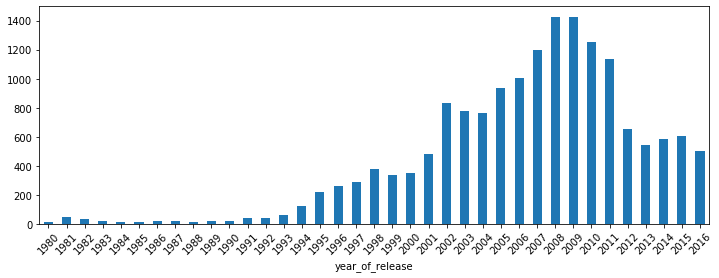

In [31]:
df_years = df_games.groupby(['year_of_release']).agg({'year_of_release':'count'}).rename(columns={'year_of_release':'count'})
df_years.plot(kind='bar', rot=45, figsize=(12,4),legend=False)
# df_years.hist(column='year_of_release', alpha=0.5)

##### Conclusion
We can see that until 1994 the games were less populars. Between 1994-2001, there was more popularity, but still it was not very segnificant. Between 2002-2011, there was a boost of games, where probably the score was important, since with allot of variaty, you should need to know which game is better to choose. Since 2012 there are a little bit less games. Probably people reed more critics and do not play what is not good.
There is a signification for the period.

### 3.2 Looking at how sales varied from platform to platform. 
Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

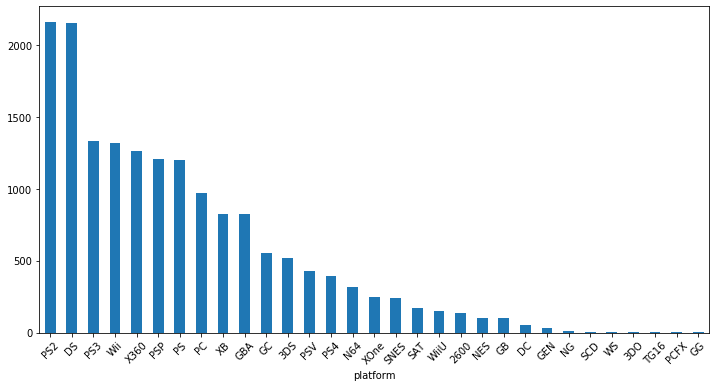

In [32]:
df_platform = df_games.groupby(['platform']).agg({'platform':'count'}).rename(columns={'platform':'count'})
df_platform = df_platform.sort_values(by=['count'],ascending=False)
df_platform.plot(kind='bar', rot=45, figsize=(12,6),legend=False)

The gratest platform are PS2 and DS. After it we have PS3, Wii and X360.

In [33]:
df_year_platform = df_games.groupby(['year_of_release','platform']).agg({'year_of_release':'count'})
df_year_platform.columns = ['count']

In [34]:
df_ps2 = df_year_platform.query('platform == "PS2"').reset_index()
df_ps2_year = df_ps2[['year_of_release','count']]
print(df_ps2_year)
# df_platform.plot('year_of_release',kind='bar', rot=45, figsize=(12,6),legend=False)

    year_of_release  count
0              2000     82
1              2001    185
2              2002    280
3              2003    256
4              2004    259
5              2005    260
6              2006    259
7              2007    214
8              2008    191
9              2009     96
10             2010     38
11             2011      7


In [35]:
df_DS = df_year_platform.query('platform == "DS"').reset_index()
df_DS_year = df_DS[['year_of_release','count']]
print(df_DS_year)

    year_of_release  count
0              1985      1
1              2004     23
2              2005    118
3              2006    201
4              2007    376
5              2008    492
6              2009    403
7              2010    323
8              2011    153
9              2012     23
10             2013      8


In [36]:
df_wii = df_year_platform.query('platform == "Wii"').reset_index()
df_wii_year = df_wii[['year_of_release','count']]
print(df_wii_year)

    year_of_release  count
0              2006     44
1              2007    185
2              2008    282
3              2009    325
4              2010    253
5              2011    143
6              2012     31
7              2013     12
8              2014      6
9              2015      4
10             2016      1


In [37]:
df_x360 = df_year_platform.query('platform == "X360"').reset_index()
df_x360_year = df_x360[['year_of_release','count']]
print(df_x360_year)

    year_of_release  count
0              2005     18
1              2006     93
2              2007    123
3              2008    146
4              2009    172
5              2010    182
6              2011    206
7              2012    106
8              2013     75
9              2014     63
10             2015     35
11             2016     13


In [38]:
df_ps3 = df_year_platform.query('platform == "PS3"').reset_index()
df_ps3_year = df_ps3[['year_of_release','count']]
print(df_ps3_year)

    year_of_release  count
0              2006     27
1              2007     90
2              2008    138
3              2009    162
4              2010    181
5              2011    215
6              2012    148
7              2013    126
8              2014    108
9              2015     73
10             2016     38


##### Conclusion
All platforms that where very popular, today are getting less new games. Wii was very popular the first year it was lanched, but had a very drastic stop in the end, while others have more normal distribution. PS3 and X360 were the only one who were still a bit relevant for 2016. DS had the best pik year with almost 500 games at 2008.

### 3.3 Determining what period you should take data for.

We saw that since year 2012 until 2016, the game releasing have the same stats. Thus, we will take this information. 

In [39]:
df_new_games = df_games.loc[df_games['year_of_release']>=2012].reset_index(drop=True)
df_new_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,72.0,72.0,E,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,72.0,72.0,E,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


### 3.4 Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

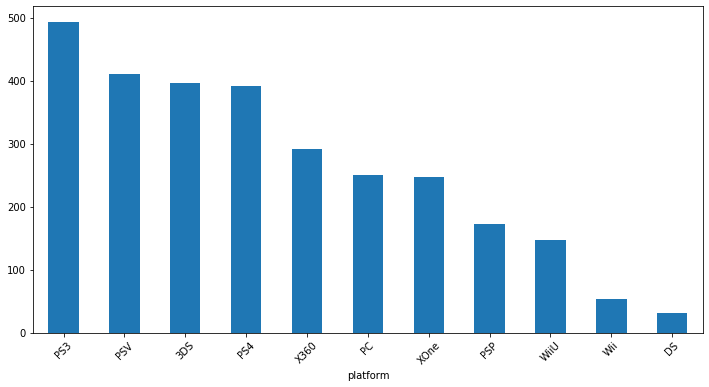

In [40]:
df_platform_new = df_new_games.groupby(['platform']).agg({'platform':'count'}).rename(columns={'platform':'count'})
df_platform_new = df_platform_new.sort_values(by=['count'],ascending=False)
df_platform_new.plot(kind='bar', rot=45, figsize=(12,6),legend=False)

We can see that all PS products are selling good in the last years, while Wii is loosing its popularity. Xbox products are midium sellers. 3DS is also a good seller.

In [41]:
df_year_platform_new = df_new_games.groupby(['year_of_release','platform']).agg({'year_of_release':'count'})
df_year_platform_new.columns = ['count']

In [42]:
df_ps3 = df_year_platform_new.query('platform == "PS3"').reset_index()
df_ps3_year = df_ps3[['year_of_release','count']]
print(df_ps3_year)

   year_of_release  count
0             2012    148
1             2013    126
2             2014    108
3             2015     73
4             2016     38


In [43]:
df_psv = df_year_platform_new.query('platform == "PSV"').reset_index()
df_psv_year = df_psv[['year_of_release','count']]
print(df_psv_year)

   year_of_release  count
0             2012     53
1             2013     63
2             2014    100
3             2015    110
4             2016     85


In [44]:
df_3DS = df_year_platform_new.query('platform == "3DS"').reset_index()
df_3DS_year = df_3DS[['year_of_release','count']]
print(df_3DS_year)

   year_of_release  count
0             2012     93
1             2013     91
2             2014     80
3             2015     86
4             2016     46


In [45]:
df_ps4 = df_year_platform_new.query('platform == "PS4"').reset_index()
df_ps4_year = df_ps4[['year_of_release','count']]
print(df_ps4_year)

   year_of_release  count
0             2013     16
1             2014     75
2             2015    137
3             2016    164


In [46]:
df_x360 = df_year_platform_new.query('platform == "X360"').reset_index()
df_x360_year = df_x360[['year_of_release','count']]
print(df_x360_year)

   year_of_release  count
0             2012    106
1             2013     75
2             2014     63
3             2015     35
4             2016     13


In [47]:
df_xone = df_year_platform_new.query('platform == "XOne"').reset_index()
df_xone_year = df_xone[['year_of_release','count']]
print(df_xone_year)

   year_of_release  count
0             2013     19
1             2014     61
2             2015     80
3             2016     87


In [48]:
df_wiiU = df_year_platform_new.query('platform == "WiiU"').reset_index()
df_wiiU_year = df_wiiU[['year_of_release','count']]
print(df_wiiU_year)

   year_of_release  count
0             2012     32
1             2013     42
2             2014     31
3             2015     28
4             2016     14


##### Conclusion
PS4 is the best seller from the big products for 2016. PSV is also relevant but is shrinking a bit. All of the top 5 from last 5 years are shrinking, regardling PS4. Xone is the increasing seller for XBox products.

### 3.5 Building a box plot for the global sales of each game, broken down by platform. 
Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [49]:
df_platform_sales_new = df_new_games.groupby(['platform']).agg({'total_sales':'sum'}).rename(columns={'platform':'total_sales'})
df_platform_sales_new.columns = ['total_sales']

In [50]:
df_platform_sales_new

,total_sales
platform,
3DS,194.61
DS,12.55
PC,62.65
PS3,288.79
PS4,314.14
PSP,11.19
PSV,49.18
Wii,35.37
WiiU,82.19


Average sales: 131.50
Median sales: 82.19


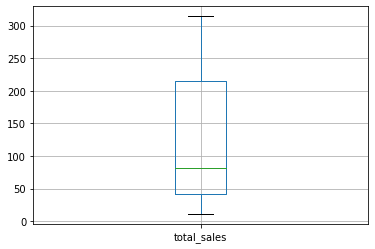

In [51]:
average_sales = df_platform_sales_new['total_sales'].mean()
print('Average sales: {:.2f}'.format(average_sales))
meedian_sales = df_platform_sales_new['total_sales'].median()
print('Median sales: {:.2f}'.format(meedian_sales))
df_platform_sales_new.boxplot()

We will compare between the two most leading selleres from different product, PS4 and X360 

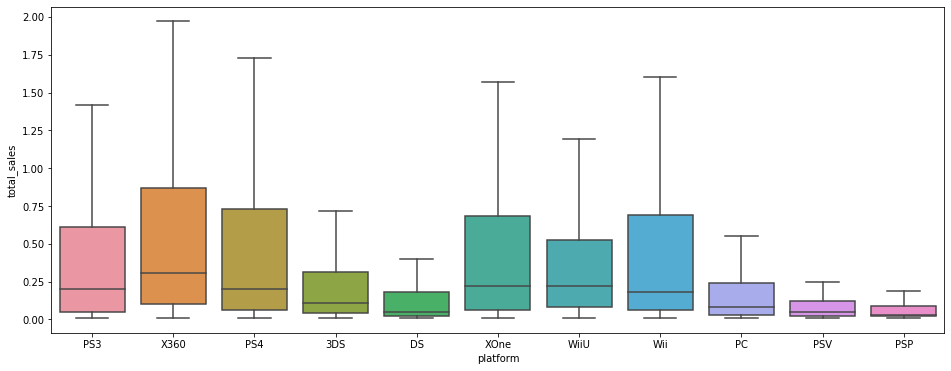

In [76]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='platform', y='total_sales', data=df_new_games, showfliers=False)

##### Conclusion
The average is 131.5, while median is 82.19. This means that few products sell allot and are very popular, while the rest of them sell not so much.

Also looking on personal platform boxplot, we can see that few games have very high sales, higher than the median.

### 3.6 Taking a look at how user and professional reviews affect sales for a particular popular platform. 
Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [53]:
df_new_games['average_score'] = (df_new_games['critic_score'] + df_new_games['user_score']) / 2
df_new_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,average_score
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05,89.5
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27,89.0
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,72.0,72.0,E,14.63,72.0
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,72.0,72.0,E,14.60,72.0
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79,68.0


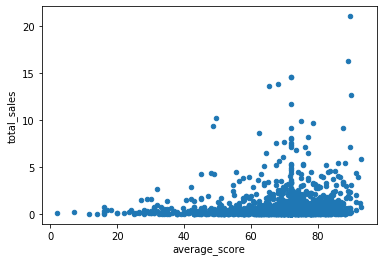

In [54]:
df_new_games.plot(x='average_score',y='total_sales',kind='scatter')

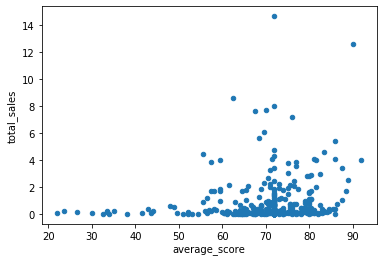

In [55]:
df_avg_ps4 = df_new_games.query('platform == "PS4"').reset_index()
df_avg_ps4.plot(x='average_score',y='total_sales',kind='scatter')

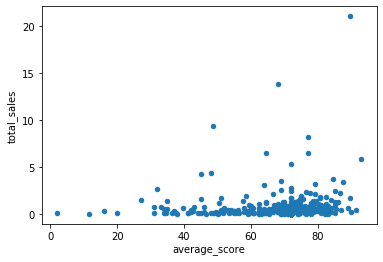

In [56]:
df_avg_ps3 = df_new_games.query('platform == "PS3"').reset_index()
df_avg_ps3.plot(x='average_score',y='total_sales',kind='scatter')

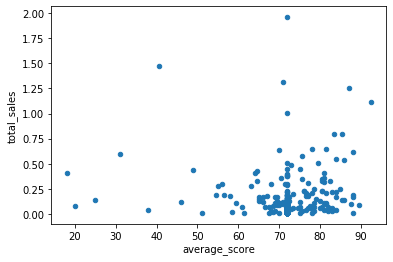

In [57]:
df_avg_psv = df_new_games.query('platform == "PSV"').reset_index()
df_avg_psv.plot(x='average_score',y='total_sales',kind='scatter')

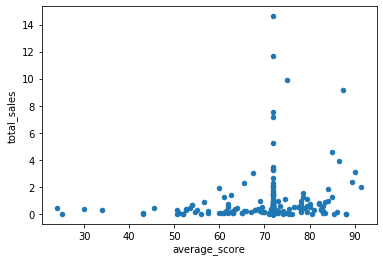

In [58]:
df_avg_3ds = df_new_games.query('platform == "3DS"').reset_index()
df_avg_3ds.plot(x='average_score',y='total_sales',kind='scatter')

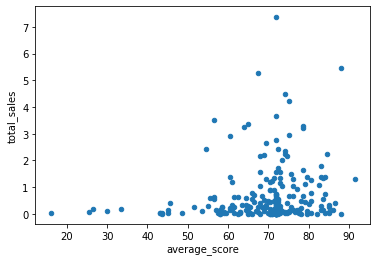

In [59]:
df_avg_xone = df_new_games.query('platform == "XOne"').reset_index()
df_avg_xone.plot(x='average_score',y='total_sales',kind='scatter')

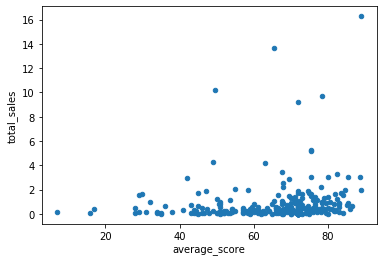

In [60]:
df_avg_x360 = df_new_games.query('platform == "X360"').reset_index()
df_avg_x360.plot(x='average_score',y='total_sales',kind='scatter')

##### Conclusion
For the new increasing platforms XOne and PS4, the average score does help, but not allways, only a bit better than older  platforms, where there reviews did not affect to much.

### 3.7 Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [61]:
double_names = set(df_new_games.groupby(['name']).filter(lambda x: x.shape[0]>1)['name'])
df_new_same_games = df_new_games.query('name in @double_names').groupby(['name','platform']).agg({'total_sales':'sum'})
df_new_best_same_games = df_new_same_games[df_new_same_games['total_sales'] >4]
df_new_best_same_games.head(20)

total_sales
name                           platform             
Assassin's Creed III           PS3              6.44
                               X360             5.29
Battlefield 1                  PS4              4.07
Call of Duty: Advanced Warfare PS3              4.36
                               PS4              7.66
                               X360             4.28
                               XOne             5.26
Call of Duty: Black Ops 3      PS4             14.63
                               XOne             7.39
Call of Duty: Black Ops II     PS3             13.79
                               X360            13.68
Call of Duty: Ghosts           PS3              9.36
                               X360            10.24
Call of Duty: Infinite Warfare PS4              4.47
Destiny                        PS4              5.64
Diablo III                     PC               5.14
FIFA 14                        PS3              6.46
                               X360             4.22
FIFA 15                        PS3              4.28
                               PS4              6.08

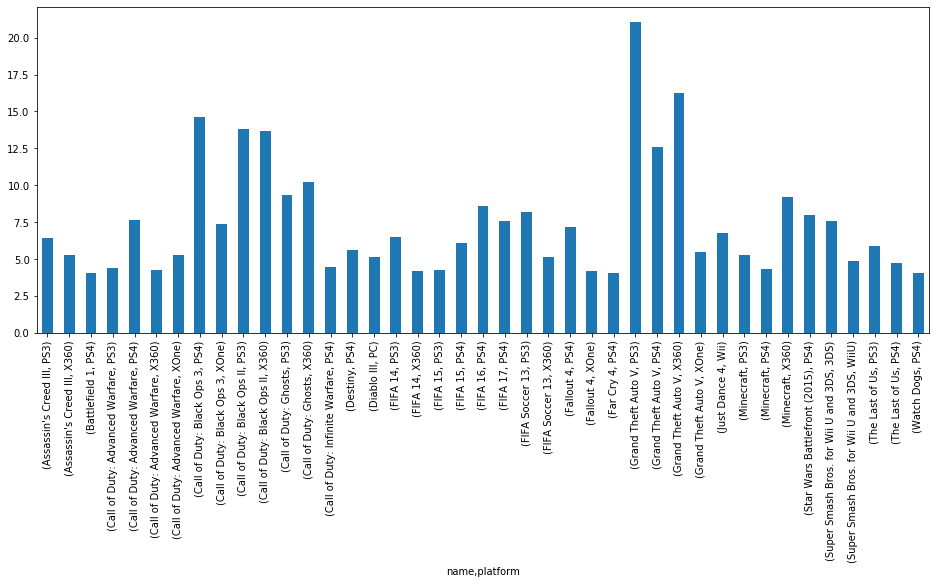

In [62]:
df_new_best_same_games.plot(kind='bar', rot=90, figsize=(16,6),legend=False)

##### Conclusion
Most of the time PS4 games are more revenue than X360, or almost equal. We can notice that usualy most of the 'Shooting' and 'Sport' games are been prefere by PS4, probalby has the best UX/UI fillings.

### 3.8 Taking a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

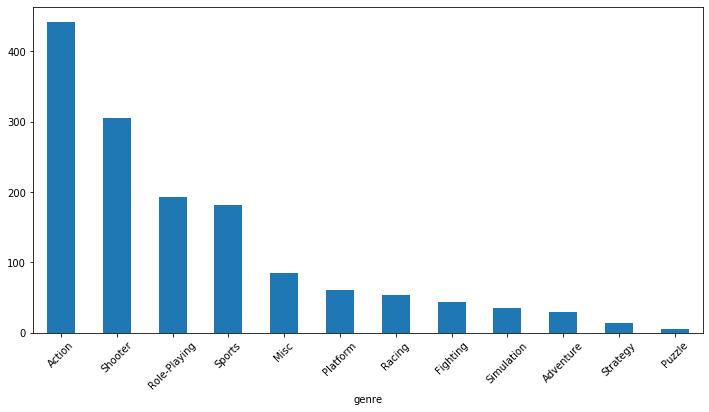

In [63]:
df_genre_new = df_new_games.groupby(['genre']).agg({'total_sales':'sum'})
df_genre_new = df_genre_new.sort_values(by=['total_sales'],ascending=False)
df_genre_new.plot(kind='bar', rot=45, figsize=(12,6),legend=False)

##### Conclusion
We can see that games with multiply players, and even those that can be played online, are more profitable. People may buy also allot of extra things online.
We also see that games with big adrenaline are more profitable than calm games as strategy and puzzle.

# Step 4. Creating a user profile for each region
For each region (NA, EU, JP), determine:

### 4.1 The top five platforms.

In [64]:
df_new_games_plat_na = df_new_games.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_new_games_plat_na.head()

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [65]:
df_new_games_plat_eu = df_new_games.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_new_games_plat_eu.head()

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [66]:
df_new_games_plat_jp = df_new_games.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_new_games_plat_jp.head()

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


##### Conclusion
The biggest sales are in Europe. Each region has its own preference of platform, in Europe they prefere PS4, while in North America they prefere XBox, and Japan preferes 3DS. The most popular platform in each region sales almos 1.5 more than the secon best seller.

### 4.2 The top five genres.

In [67]:
df_new_games_genre_na = df_new_games.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_new_games_genre_na.head()

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [68]:
df_new_games_genre_eu = df_new_games.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_new_games_genre_eu.head()

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [69]:
df_new_games_genre_jp = df_new_games.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_new_games_genre_jp.head()


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


Me also, but I had realy bad time trying to understand how to do it, since after groupby or pivot table, the columns name are in to different level of rows, making it the first not a column name, and impossible to plot them.

##### Conclusion
Here, the biggest sales are in North America. Together with Europe, they have almost the same preference of genre leading with Action and Shooting. Japanese are addicted more to Role-Playing. Probably, Shooting games are prohibited at Japan, since they are not even in the top 5 there.

### 4.3 Do ESRB ratings affect sales in individual regions?

In [70]:
df_new_games_esrb_na = df_new_games.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_new_games_esrb_na.head()

,na_sales
rating,
M,231.57
E,217.68
E10+,75.70
T,66.02


In [71]:
df_new_games_esrb_eu = df_new_games.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_new_games_esrb_eu.head()

,eu_sales
rating,
E,204.53
M,193.96
E10+,55.37
T,52.96


In [72]:
df_new_games_esrb_jp = df_new_games.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_new_games_esrb_jp.head()

,jp_sales
rating,
E,137.17
T,26.02
M,21.20
E10+,8.19


##### Conclusion
Here, the biggest sales are for 'E' (every one), but also 'M' (mature +17) is very popular. This 'M' games are mostly violent and may have sexuality and gambling. This results make sence for example in Japan, were Shooting games did not appear and 'M' games are not almos sold. Again, making sence with the genre results, North America and Europe sale pretty near the same amount and with the same order of games.

# Step 5. Test the following hypotheses:

### 5.1 Average user ratings of the Xbox One and PC platforms are the same. 
For both test we will use confidence level of 0.05.

H0: The average are the same.

H1: The average are different.

Moreover, we don't know the distributions and their variance, thus, equal_variance = False.

We will test the hypothesis that both average user ratings of the Xbox One and PC platforms are the same.

In [73]:
def ttest_general(a,b):
    alpha = .05       # critical statistical significance level

    results = st.ttest_ind(a,b,equal_var=False)
    print('p-value: {:.10f}'.format(results.pvalue))

    if (results.pvalue<alpha):
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [74]:
ttest_xone = df_new_games.query('platform == "XOne"')['user_score']
ttest_pc = df_new_games.query('platform == "PC"')['user_score']
print('The average user ratings of the Xbox platform is: {:.2f}.'.format(ttest_xone.mean()))
print('The average user ratings of the PC platform is: {:.2f}.'.format(ttest_pc.mean()))
print('The ttest:')
ttest_general(ttest_xone,ttest_pc)

The average user ratings of the Xbox platform is: 66.83.
The average user ratings of the PC platform is: 65.63.
The ttest:
p-value: 0.3375782443
We can't reject the null hypothesis


##### Conclusion
We can learn already from the means that the user average score are really close, and by ttest we can not reject the null hypothesis, and we can say that the user average score are much more near each other with confidence level of 0.05, from XOne and PC platforms.

### 5.2 Average user ratings for the Action and Sports genres are different.
We will test the hypothesis that both average user ratings of the Action and Sport genres are the same.

In [75]:
ttest_action = df_new_games.query('genre == "Action"')['user_score']
ttest_sports = df_new_games.query('genre == "Sports"')['user_score']
print('The average user ratings of the Action genre is: {:.2f}.'.format(ttest_action.mean()))
print('The average user ratings of the Sports genre is: {:.2f}.'.format(ttest_sports.mean()))
print('The ttest:')
ttest_general(ttest_action,ttest_sports)

The average user ratings of the Action genre is: 70.04.
The average user ratings of the Sports genre is: 59.08.
The ttest:
p-value: 0.0000000000
We reject the null hypothesis


##### Conclusion
We can learn already from the means that the user average score are not close at all, and by ttest we can reject the null hypothesis, and we can say that the user average score of genre Sports and Action are very different from each other and they are not equal with confidence level of 0.05 and more, since p-value is so small.

# Step 6. General conclusion

In this project we check data of console games. We first verify the data, and pre process it with correcting columns and dealing with null values.

We had categorized data like genre, years as date data, region of sales and different scores of the audience.
We check first the hole data, and figure out that sales are divided by period. Since we need forecast for next year, we focused on the data of the last and relevant period of 5 last years.

We figure out that different genre games and platforms are more or less popular on special rigions we had information about (North America, Europe and Japan), and we found out that while NA and Europe have prety the same behavior and preferations, Japan is totaly differen in culture and preferations.

Then we tried to figure out if the critics and score it recieve from people affect to the sales, and we found there a few connection between them, but only on the platforms that are newer. Probably people are more exposed and affected by critics when it comes choosing a game.

At the end we check users reviews hypothesis on differen genre and platform, and we found out that when a game is intresting, both in XOne or PC people will fill the same about the game, when it comes to genres there is a big differention between the scores they get. This is probably since companies prefere to invest improving more the games from the genre people like the most and bring them more money.